In [1]:
from data import *
import matplotlib.pyplot as plt
from utils import *
from torchvision.utils import make_grid

### MNIST

100%|██████████| 9912422/9912422 [00:05<00:00, 1772073.41it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 47545.29it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:01<00:00, 1248169.75it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9694925.58it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



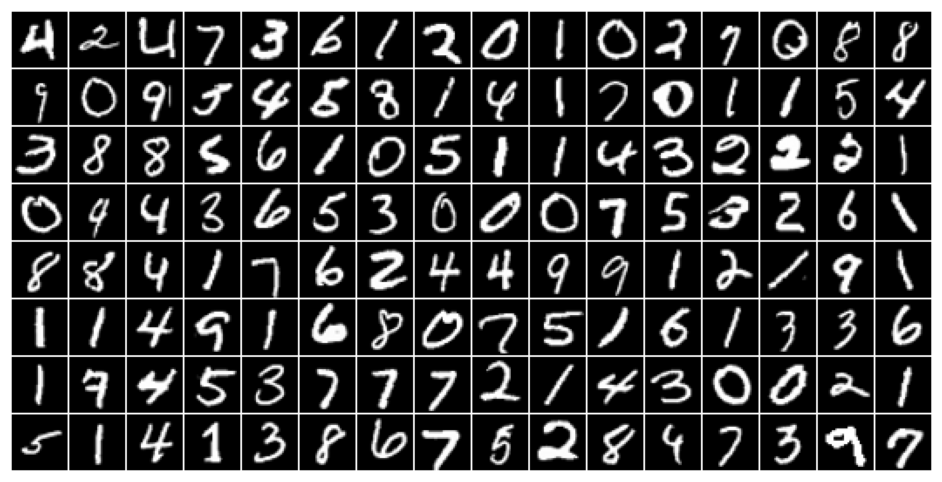

In [2]:
loader = get_dataloader(
            dataset_name="MNIST",
            batch_size=128,
            device='cpu')

plt.figure(figsize=(12, 6), facecolor='white')

for b_image, _ in loader:
    b_image = inverse_transform(b_image).cpu()
    grid_img = make_grid(b_image / 255.0, nrow=16, padding=True, pad_value=1, normalize=True)
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis("off")
    plt.savefig('./debug/dateset_debug.png')
    break

In [1]:
import math
import torch

time_emb_dims = 128
total_time_steps = 1000
half_dim = time_emb_dims // 2

emb = math.log(10000) / (half_dim - 1)
emb = torch.exp(torch.arange(half_dim, dtype=torch.float32) * -emb)

ts = torch.arange(total_time_steps, dtype=torch.float32)

emb = torch.unsqueeze(ts, dim=-1) * torch.unsqueeze(emb, dim=0)
emb = torch.cat((emb.sin(), emb.cos()), dim=-1)

print(emb.shape)

torch.Size([1000, 128])


### Cifar-10

100%|██████████| 170498071/170498071 [04:12<00:00, 674026.90it/s] 


Extracting data/cifar-10-python.tar.gz to data


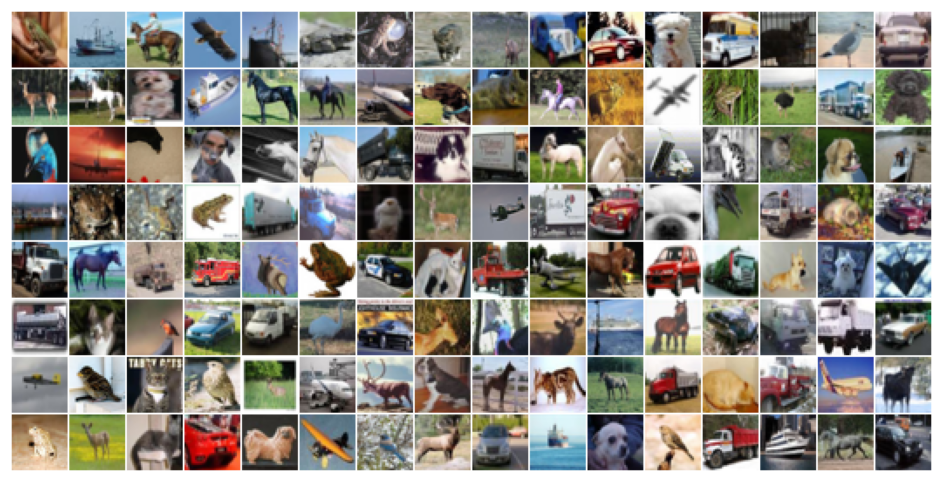

In [2]:
loader = get_dataloader(
            dataset_name="Cifar-10",
            batch_size=128,
            device='cpu')

plt.figure(figsize=(12, 6), facecolor='white')

for b_image, _ in loader:
    b_image = inverse_transform(b_image).cpu()
    grid_img = make_grid(b_image / 255.0, nrow=16, padding=True, pad_value=1, normalize=True)
    plt.imshow(grid_img.permute(1, 2, 0))
    plt.axis("off")
    plt.savefig('./debug/dateset_debug.png')
    break

In [17]:
from pathlib import Path

i = 1
for p in Path('./Logs_Checkpoints/Inference/version_6').iterdir():
    if p.suffix == ".png" and i % 2 == 0 and int(p.stem) != 997:
        p.unlink()
    i += 1

In [18]:
!convert ./Logs_Checkpoints/Inference/version_6/*.png ./xxx.gif 